#Header
Association Rule Mining

Sarah Kim

#Task I

## Install the apyori package.

In [42]:
!pip install apyori

##Import packages

In [43]:
# Mathematics and Dataframe Packages
import pandas as pd

# Google Colab and CSV Packages
from google.colab import drive
import csv

# Graphical Packages
from matplotlib import pyplot as plt
%matplotlib inline

# K-Itemset and Asociation Rules Algorithm Package
from apyori import apriori

# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')


# Model Evaluation Packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support

##Pre-defined functions

In [44]:
# Make a Function to make Apriori Association Rule Results Readable
def parse(rules):
  # Initialize
  i = 0
  # Convert Apriori Output to a List
  apriori_rules = list(rules)
  # Loop Over K-Itemset
  for relation_record in apriori_rules:
    # Define K-Itemset
    itemset = relation_record[0]
    # Define Support
    support = relation_record[1]
    # Define List of Rules Associated with K-Itemset
    relation_rules = [x for x in relation_record[2]]
    # Loop Over K-Itemset Rules
    for rule in relation_rules:
        # Assign Rule Number
        i += 1
        # Get Length of Itemset to Establish "K" Value
        itemset_length = len(itemset)
        # Print K-Itemset
        print(str(itemset_length)+"-Itemset: "+str(set(itemset)))
        # Print Support for K-Itemset
        print("Support: "+str(round(relation_record[1],2)))
        # Print Particular Association Rule
        print("Rule "+str(i)+": "+str(set(rule[0]))+" -> "+str(set(rule[1])))
        # Print Confidence Level of Association Rule
        print("Confidence: "+str(round(rule[2],2)))
        # Print Lift of Association Rule
        print("Lift: "+str(round(rule[3],2)))
        # Separate Rules by a Newline Character
        print("\n")

##Read-in dataset

In [45]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
with open('/content/gdrive/MyDrive/Data_Sets/Walmart_baskets_1week_lst.csv',newline='') as datafile:

  reader = csv.reader(datafile)
  walmart_baskets = list(reader)

##Display number of entries

In [47]:
len(walmart_baskets)

2000

##Display first ten entries

In [48]:
walmart_baskets[0:10]

[['FABRICS AND CRAFTS'],
 ['HARDWARE', 'PERSONAL CARE', 'PHARMACY OTC'],
 ['FROZEN FOODS', 'PRODUCE', 'SEAFOOD'],
 ['FROZEN FOODS'],
 ['LADIESWEAR'],
 ['FINANCIAL SERVICES'],
 ['FINANCIAL SERVICES'],
 ['CANDY', ' TOBACCO', ' COOKIES', 'DSD GROCERY', 'HOUSEHOLD PAPER GOODS'],
 ['BEAUTY'],
 ['FINANCIAL SERVICES', 'IMPULSE MERCHANDISE']]

##Display 20th through 29th list entries 

In [49]:
walmart_baskets[20:30]

[['DAIRY', 'PRE PACKED DELI'],
 ['DAIRY', 'DSD GROCERY', 'LADIESWEAR'],
 ['IMPULSE MERCHANDISE', 'INFANT CONSUMABLE HARDLINES', 'SHOES'],
 ['PERSONAL CARE'],
 ['GROCERY DRY GOODS'],
 ['GROCERY DRY GOODS', 'LADIESWEAR', 'PRODUCE'],
 ['MENS WEAR'],
 ['IMPULSE MERCHANDISE', 'PERSONAL CARE'],
 ['AUTOMOTIVE'],
 ['JEWELRY AND SUNGLASSES']]

## Flatten the dataset 

In [50]:
# Convert the 2D List of Lists to a Single List with the Same Ordering
flattened_basket = [item for sublist in walmart_baskets for item in sublist]

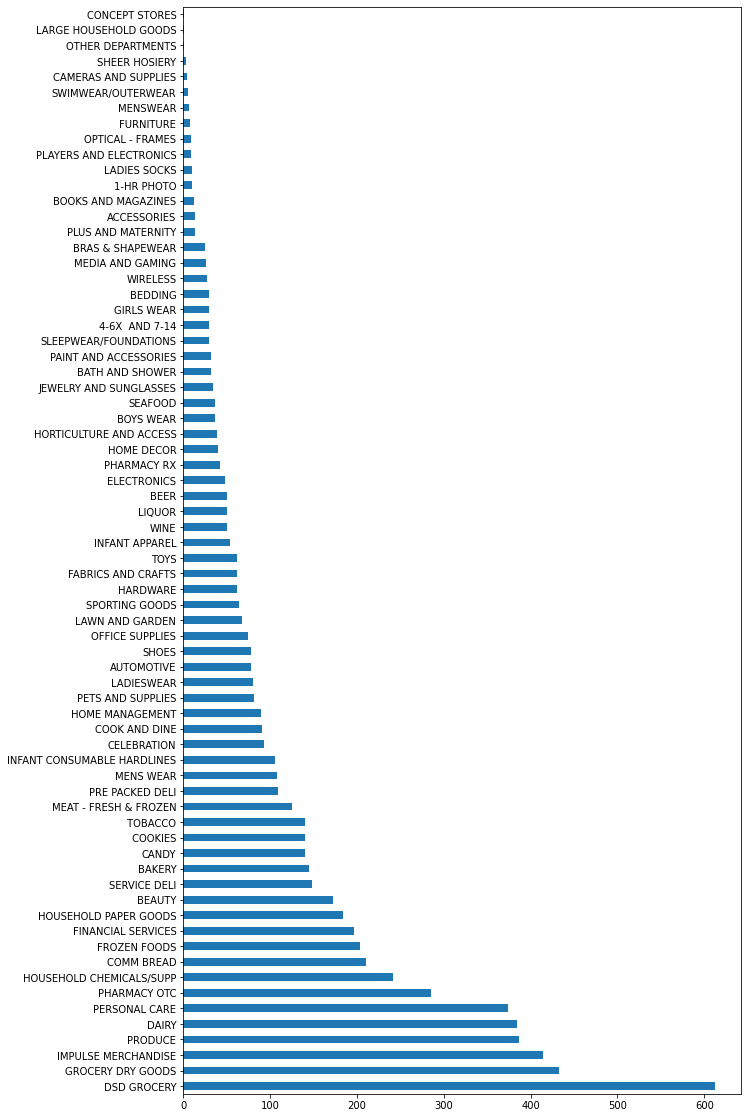

In [51]:
# plot a horizontal barchart of word counts
pd.get_dummies(flattened_basket).sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,20))
plt.show()


#Task II: Apriori - Part 1

##A:

In [52]:
association_rules_1 = apriori(walmart_baskets,min_support=0.075,min_confidence=0.2,min_lift=1.2) 

##B:

In [53]:
parse(association_rules_1)

2-Itemset: {'COMM BREAD', 'GROCERY DRY GOODS'}
Support: 0.08
Rule 1: {'COMM BREAD'} -> {'GROCERY DRY GOODS'}
Confidence: 0.73
Lift: 3.37


2-Itemset: {'COMM BREAD', 'GROCERY DRY GOODS'}
Support: 0.08
Rule 2: {'GROCERY DRY GOODS'} -> {'COMM BREAD'}
Confidence: 0.35
Lift: 3.37


2-Itemset: {'DSD GROCERY', 'DAIRY'}
Support: 0.12
Rule 3: {'DAIRY'} -> {'DSD GROCERY'}
Confidence: 0.64
Lift: 2.09


2-Itemset: {'DSD GROCERY', 'DAIRY'}
Support: 0.12
Rule 4: {'DSD GROCERY'} -> {'DAIRY'}
Confidence: 0.4
Lift: 2.09


2-Itemset: {'GROCERY DRY GOODS', 'DAIRY'}
Support: 0.12
Rule 5: {'DAIRY'} -> {'GROCERY DRY GOODS'}
Confidence: 0.61
Lift: 2.81


2-Itemset: {'GROCERY DRY GOODS', 'DAIRY'}
Support: 0.12
Rule 6: {'GROCERY DRY GOODS'} -> {'DAIRY'}
Confidence: 0.54
Lift: 2.81


2-Itemset: {'PRODUCE', 'DAIRY'}
Support: 0.1
Rule 7: {'DAIRY'} -> {'PRODUCE'}
Confidence: 0.51
Lift: 2.64


2-Itemset: {'PRODUCE', 'DAIRY'}
Support: 0.1
Rule 8: {'PRODUCE'} -> {'DAIRY'}
Confidence: 0.51
Lift: 2.64


2-Itemset: {'GR

##C:

The resulting rules imply that people tend to buy groceries together, which is not surprising. The lift values also indicate positive correlations among the items.  

---



#Task III: Apriori - Part 2

##A:

In [54]:
association_rules_2 = apriori(walmart_baskets,min_support=0.075,min_confidence=0.5,min_lift=1.2)

##B:

In [55]:
parse(association_rules_2)

2-Itemset: {'COMM BREAD', 'GROCERY DRY GOODS'}
Support: 0.08
Rule 1: {'COMM BREAD'} -> {'GROCERY DRY GOODS'}
Confidence: 0.73
Lift: 3.37


2-Itemset: {'DSD GROCERY', 'DAIRY'}
Support: 0.12
Rule 2: {'DAIRY'} -> {'DSD GROCERY'}
Confidence: 0.64
Lift: 2.09


2-Itemset: {'GROCERY DRY GOODS', 'DAIRY'}
Support: 0.12
Rule 3: {'DAIRY'} -> {'GROCERY DRY GOODS'}
Confidence: 0.61
Lift: 2.81


2-Itemset: {'GROCERY DRY GOODS', 'DAIRY'}
Support: 0.12
Rule 4: {'GROCERY DRY GOODS'} -> {'DAIRY'}
Confidence: 0.54
Lift: 2.81


2-Itemset: {'PRODUCE', 'DAIRY'}
Support: 0.1
Rule 5: {'DAIRY'} -> {'PRODUCE'}
Confidence: 0.51
Lift: 2.64


2-Itemset: {'PRODUCE', 'DAIRY'}
Support: 0.1
Rule 6: {'PRODUCE'} -> {'DAIRY'}
Confidence: 0.51
Lift: 2.64


2-Itemset: {'GROCERY DRY GOODS', 'DSD GROCERY'}
Support: 0.13
Rule 7: {'GROCERY DRY GOODS'} -> {'DSD GROCERY'}
Confidence: 0.6
Lift: 1.97


2-Itemset: {'PRODUCE', 'DSD GROCERY'}
Support: 0.11
Rule 8: {'PRODUCE'} -> {'DSD GROCERY'}
Confidence: 0.55
Lift: 1.81


2-Itemset

##C:

* There are more 2-itemset rules than 3-itemset rules when increasing the minimum confidence threshold. 
* The support values are low compared to confidence and lift values. That may mean that those itemsets may not appear frequently in the whole basket dataset. Though when they do appear, the associations are quite strong. 

#Task IV: Apriori - Part 3

##A:

In [56]:
association_rules_3 = apriori(walmart_baskets,min_support=0.075,min_confidence=0.2,min_lift=2.1) 

##B:

In [57]:
parse(association_rules_3)

2-Itemset: {'COMM BREAD', 'GROCERY DRY GOODS'}
Support: 0.08
Rule 1: {'COMM BREAD'} -> {'GROCERY DRY GOODS'}
Confidence: 0.73
Lift: 3.37


2-Itemset: {'COMM BREAD', 'GROCERY DRY GOODS'}
Support: 0.08
Rule 2: {'GROCERY DRY GOODS'} -> {'COMM BREAD'}
Confidence: 0.35
Lift: 3.37


2-Itemset: {'GROCERY DRY GOODS', 'DAIRY'}
Support: 0.12
Rule 3: {'DAIRY'} -> {'GROCERY DRY GOODS'}
Confidence: 0.61
Lift: 2.81


2-Itemset: {'GROCERY DRY GOODS', 'DAIRY'}
Support: 0.12
Rule 4: {'GROCERY DRY GOODS'} -> {'DAIRY'}
Confidence: 0.54
Lift: 2.81


2-Itemset: {'PRODUCE', 'DAIRY'}
Support: 0.1
Rule 5: {'DAIRY'} -> {'PRODUCE'}
Confidence: 0.51
Lift: 2.64


2-Itemset: {'PRODUCE', 'DAIRY'}
Support: 0.1
Rule 6: {'PRODUCE'} -> {'DAIRY'}
Confidence: 0.51
Lift: 2.64


2-Itemset: {'PRODUCE', 'GROCERY DRY GOODS'}
Support: 0.1
Rule 7: {'GROCERY DRY GOODS'} -> {'PRODUCE'}
Confidence: 0.48
Lift: 2.48


2-Itemset: {'PRODUCE', 'GROCERY DRY GOODS'}
Support: 0.1
Rule 8: {'PRODUCE'} -> {'GROCERY DRY GOODS'}
Confidence: 0.

##C:

As the list threshold increase, more 3 itemsets appear.

#Task V: IPYNB and HTML Files

In [58]:
%%shell
 jupyter nbconvert --to html /content/gdrive/MyDrive/Data_Sets/Assignment10_Kim_Sarah.ipynb

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Data_Sets/Assignment10_Kim_Sarah.ipynb to html
[NbConvertApp] Writing 417257 bytes to /content/gdrive/MyDrive/Data_Sets/Assignment10_Kim_Sarah.html
